Sales Analysis

In [81]:
# import necessary libraries

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns 
import calendar

Merging all files into one file

In [82]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir("./Sales_Data/")]
all_data = pd.DataFrame()
for file  in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_data = pd.concat([all_data, df])

all_data.to_csv("final_data.csv", index=False)

In [83]:
all_data = pd.read_csv("final_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Get month and time details

In [84]:
all_data.columns = all_data.columns.str.strip()
time_info = all_data['Order Date'].str.split(' ', expand=True)
all_data['Date'] = time_info[0]
all_data['Time'] = time_info[1]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04/19/19,08:46
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38


In [85]:
all_data.drop(columns=['Order Date'], inplace=True)

In [86]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38


Clean up of Data

In [87]:
all_data['Month'] = all_data['Date'].str[0:2]
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30,04
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,04
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,04


In [88]:
nan_count = all_data['Month'].isna().sum()
print(nan_count)

545


In [89]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
unique_values = all_data['Month'].unique()
print(unique_values)

['04' nan '05' 'Or' '08' '09' '12' '01' '02' '03' '07' '06' '11' '10']


In [91]:
rows_with_or = all_data[all_data['Month'] == 'Or']
all_data = all_data[all_data['Month'] != 'Or']
all_data = all_data[all_data['Month'] != '']
all_data = all_data.dropna(subset=['Month'])
all_data['Month'] = all_data['Month'].astype('int32')


In [92]:
all_data.to_csv('all_data.csv')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Purchase Address  185950 non-null  object
 5   Date              185950 non-null  object
 6   Time              185950 non-null  object
 7   Month             185950 non-null  int32 
dtypes: int32(1), object(7)
memory usage: 12.1+ MB


In [93]:
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('float')

In [94]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30,4,99.99
3,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,4,600.00
4,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,4,11.99
5,176561,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,4,11.99


Question 1: What was the best month? How much earned that month?

In [95]:
result = all_data.groupby('Month').sum()

C:\Users\shrey\AppData\Local\Temp\ipykernel_19224\4257767953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_names, y=result['Sales'], palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

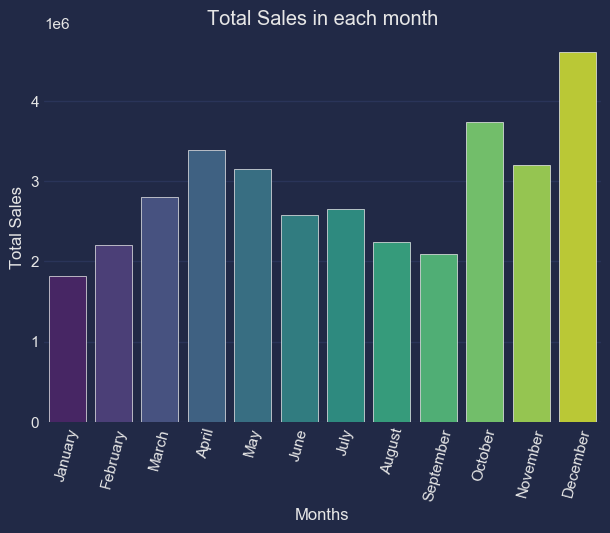

In [96]:
month_names = [calendar.month_name[i] for i in range(1, 13)]
sns.barplot(x=month_names, y=result['Sales'], palette='viridis')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.title('Total Sales in each month')
plt.xticks(rotation=75)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 [Text(0.0, 0, 'January'),
  Text(1.0, 0, 'February'),
  Text(2.0, 0, 'March'),
  Text(3.0, 0, 'April'),
  Text(4.0, 0, 'May'),
  Text(5.0, 0, 'June'),
  Text(6.0, 0, 'July'),
  Text(7.0, 0, 'August'),
  Text(8.0, 0, 'September'),
  Text(9.0, 0, 'October'),
  Text(10.0, 0, 'November'),
  Text(11.0, 0, 'December')])

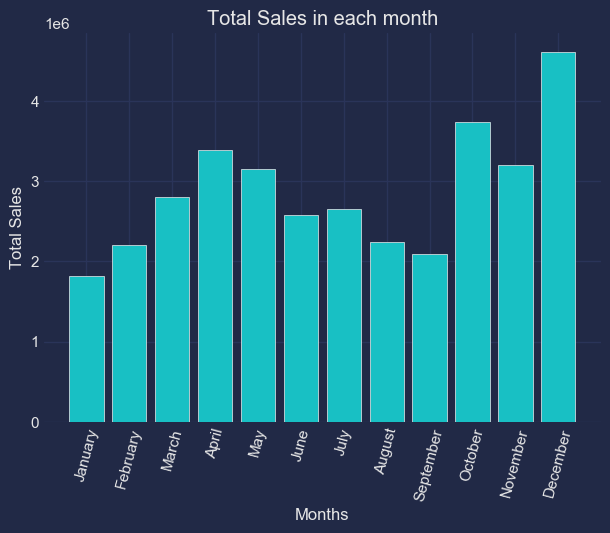

In [97]:
plt.bar(month_names, result['Sales'])
plt.xticks(month_names)
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.title('Total Sales in each month')
plt.xticks(rotation=75)

In [98]:
print(result['Sales'])

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64


Which city has the highest sales

In [99]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30,4,99.99
3,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,4,600.00
4,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,4,11.99
5,176561,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,4,11.99


In [100]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[2])


In [101]:
all_data['City'] = all_data['City'].str.strip()
all_data['State'] = all_data['State'].str.strip()

In [102]:
all_data['State']

0         TX 75001
2         MA 02215
3         CA 90001
4         CA 90001
5         CA 90001
            ...   
186845    CA 90001
186846    CA 94016
186847    CA 94016
186848    CA 94016
186849    CA 94016
Name: State, Length: 185950, dtype: object

In [103]:
all_data['State'] = all_data['State'].str.extract(r'([A-Za-z]+)')

In [104]:
all_data['State']

0         TX
2         MA
3         CA
4         CA
5         CA
          ..
186845    CA
186846    CA
186847    CA
186848    CA
186849    CA
Name: State, Length: 185950, dtype: object

In [105]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sales,City,State
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30,4,99.99,Boston,MA
3,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,4,11.99,Los Angeles,CA


In [106]:
all_data['City'] = all_data.apply(lambda x: f"{x['City']} ({x['State']})", axis=1)

In [107]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sales,City,State
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,4,23.90,Dallas (TX),TX
2,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30,4,99.99,Boston (MA),MA
3,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,4,600.00,Los Angeles (CA),CA
4,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,4,11.99,Los Angeles (CA),CA
5,176561,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,4,11.99,Los Angeles (CA),CA


City Sales

In [108]:
result = all_data.groupby(['City']).sum()

In [109]:
result

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sales,State
City,,,,,,,,,,
Atlanta (GA),1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602.0,2779908.20,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",04/12/1904/19/1904/27/1904/04/1904/20/1904/21/...,10:5814:2912:2012:2323:5114:5708:0020:4020:461...,104794,2795498.58,GAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGA...
Austin (TX),1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153.0,1809873.61,"600 Maple St, Austin, TX 73301267 11th St, Aus...",04/21/1904/11/1904/20/1904/01/1904/17/1904/11/...,07:2116:5920:5311:5015:1713:0509:3823:5217:381...,69829,1819581.75,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...
Boston (MA),1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528.0,3637409.77,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",04/07/1904/08/1904/09/1904/09/1904/07/1904/07/...,22:3014:0523:3521:3811:3111:3115:5412:1116:092...,141112,3661642.01,MAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMA...
Dallas (TX),1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730.0,2752627.82,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",04/19/1904/16/1904/22/1904/04/1904/27/1904/30/...,08:4619:2315:0919:2520:1109:3900:4010:3504:031...,104620,2767975.40,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...
Los Angeles (CA),1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289.0,5421435.23,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",04/12/1904/12/1904/30/1904/18/1904/03/1904/03/...,14:3814:3809:2717:1819:4219:4211:4200:3519:381...,208325,5452570.80,CACACACACACACACACACACACACACACACACACACACACACACA...
New York City (NY),1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932.0,4635370.83,"149 Dogwood St, New York City, NY 10001433 Hil...",04/04/1904/27/1904/11/1904/11/1904/11/1904/26/...,20:3000:3010:2311:4615:2518:5810:0320:0416:421...,175741,4664317.43,NYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNY...
Portland (ME),1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750.0,447189.25,"30 9th St, Portland, ME 04101370 Sunset St, Po...",04/25/1904/13/1904/22/1904/01/1904/06/1904/25/...,20:0714:1509:5313:1100:2615:5921:0418:0306:440...,17144,449758.27,MEMEMEMEMEMEMEMEMEMEMEMEMEMEMEMEMEMEMEMEMEMEME...
Portland (OR),1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303.0,1860558.22,"146 Jackson St, Portland, OR 97035906 7th St, ...",04/20/1904/15/1904/25/1904/17/1904/22/1904/24/...,12:0013:4508:0318:3807:1401:1712:4610:3410:352...,70621,1870732.34,OROROROROROROROROROROROROROROROROROROROROROROR...
San Francisco (CA),1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239.0,8211461.74,"381 Wilson St, San Francisco, CA 94016915 Will...",04/29/1904/24/1904/27/1904/24/1904/10/1904/10/...,13:0310:3818:4120:3917:0017:0023:0413:3920:330...,315520,8262203.91,CACACACACACACACACACACACACACACACACACACACACACACA...


C:\Users\shrey\AppData\Local\Temp\ipykernel_19224\3394477286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cities, y=result['Sales'], palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Atlanta (GA)'),
  Text(1, 0, 'Austin (TX)'),
  Text(2, 0, 'Boston (MA)'),
  Text(3, 0, 'Dallas (TX)'),
  Text(4, 0, 'Los Angeles (CA)'),
  Text(5, 0, 'New York City (NY)'),
  Text(6, 0, 'Portland (ME)'),
  Text(7, 0, 'Portland (OR)'),
  Text(8, 0, 'San Francisco (CA)'),
  Text(9, 0, 'Seattle (WA)')])

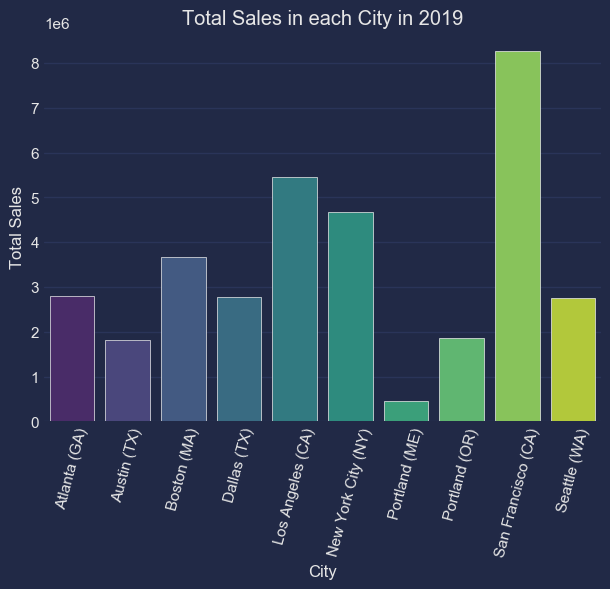

In [110]:
cities = [city for city, df in all_data.groupby('City')]
plt.style.use('pitayasmoothie-dark.mplstyle.txt')
sns.barplot(x=cities, y=result['Sales'], palette='viridis')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales in each City in 2019')
plt.xticks(rotation=75)

What time should we display advertisements in order to increase sales?

In [111]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sales,City,State
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,4,23.90,Dallas (TX),TX
2,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30,4,99.99,Boston (MA),MA
3,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,4,600.00,Los Angeles (CA),CA
4,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,4,11.99,Los Angeles (CA),CA
5,176561,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,4,11.99,Los Angeles (CA),CA


In [112]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Purchase Address  185950 non-null  object 
 5   Date              185950 non-null  object 
 6   Time              185950 non-null  object 
 7   Month             185950 non-null  int32  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  State             185950 non-null  object 
dtypes: float64(3), int32(1), object(7)
memory usage: 16.3+ MB


In [113]:
all_data['Time'] = pd.to_datetime(all_data['Time'])
all_data['Date'] = pd.to_datetime(all_data['Date'])

C:\Users\shrey\AppData\Local\Temp\ipykernel_19224\2319913714.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Time'] = pd.to_datetime(all_data['Time'])
C:\Users\shrey\AppData\Local\Temp\ipykernel_19224\2319913714.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Date'] = pd.to_datetime(all_data['Date'])


In [114]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Purchase Address  185950 non-null  object        
 5   Date              185950 non-null  datetime64[ns]
 6   Time              185950 non-null  datetime64[ns]
 7   Month             185950 non-null  int32         
 8   Sales             185950 non-null  float64       
 9   City              185950 non-null  object        
 10  State             185950 non-null  object        
dtypes: datetime64[ns](2), float64(3), int32(1), object(5)
memory usage: 16.3+ MB


In [115]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sales,City,State
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",2019-04-19,2023-12-27 08:46:00,4,23.90,Dallas (TX),TX
2,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07,2023-12-27 22:30:00,4,99.99,Boston (MA),MA
3,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,2023-12-27 14:38:00,4,600.00,Los Angeles (CA),CA
4,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,2023-12-27 14:38:00,4,11.99,Los Angeles (CA),CA
5,176561,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30,2023-12-27 09:27:00,4,11.99,Los Angeles (CA),CA


In [116]:
all_data['Time'] = all_data['Time'].dt.strftime('%H:%M:%S')

In [117]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sales,City,State
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:00,4,23.90,Dallas (TX),TX
2,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30:00,4,99.99,Boston (MA),MA
3,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,4,600.00,Los Angeles (CA),CA
4,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,4,11.99,Los Angeles (CA),CA
5,176561,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27:00,4,11.99,Los Angeles (CA),CA


In [118]:
all_data['Hour'] = all_data.apply(lambda x: pd.to_datetime(x['Time']).hour, axis = 1)

In [119]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sales,City,State,Hour
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:00,4,23.90,Dallas (TX),TX,8
2,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30:00,4,99.99,Boston (MA),MA,22
3,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,4,600.00,Los Angeles (CA),CA,14
4,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,4,11.99,Los Angeles (CA),CA,14
5,176561,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27:00,4,11.99,Los Angeles (CA),CA,9


In [120]:
all_data.drop(columns=['Purchase Address'], inplace=True)

In [121]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Date,Time,Month,Sales,City,State,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19,08:46:00,4,23.90,Dallas (TX),TX,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07,22:30:00,4,99.99,Boston (MA),MA,22
3,176560,Google Phone,1.0,600.00,2019-04-12,14:38:00,4,600.00,Los Angeles (CA),CA,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12,14:38:00,4,11.99,Los Angeles (CA),CA,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30,09:27:00,4,11.99,Los Angeles (CA),CA,9


In [122]:
all_data['Minute'] = all_data.apply(lambda x: pd.to_datetime(x['Time']).minute, axis = 1)

In [123]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Date,Time,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19,08:46:00,4,23.90,Dallas (TX),TX,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07,22:30:00,4,99.99,Boston (MA),MA,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12,14:38:00,4,600.00,Los Angeles (CA),CA,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12,14:38:00,4,11.99,Los Angeles (CA),CA,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30,09:27:00,4,11.99,Los Angeles (CA),CA,9,27


([<matplotlib.axis.XTick at 0x25125f236d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

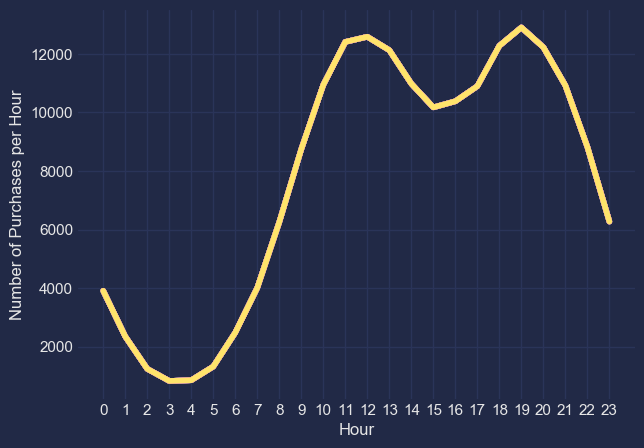

In [126]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.style.use('pitayasmoothie-dark.mplstyle.txt')
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xlabel('Hour')
plt.ylabel('Number of Purchases per Hour')
plt.xticks(hours)

In [125]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
